In [98]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### FB15K237

In [99]:
df_train = pd.read_csv("../data/fb15k237/train.txt", sep="\t", header=None, names=["head", "relation", "tail"])
df_val = pd.read_csv("../data/fb15k237/valid.txt", sep="\t", header=None, names=["head", "relation", "tail"])
df_test = pd.read_csv("../data/fb15k237/test.txt", sep="\t", header=None, names=["head", "relation", "tail"])

In [100]:
df_train.head()

,head,relation,tail
0,/m/027rn,/location/country/form_of_government,/m/06cx9
1,/m/017dcd,/tv/tv_program/regular_cast./tv/regular_tv_app...,/m/06v8s0
2,/m/07s9rl0,/media_common/netflix_genre/titles,/m/0170z3
3,/m/01sl1q,/award/award_winner/awards_won./award/award_ho...,/m/044mz_
4,/m/0cnk2q,/soccer/football_team/current_roster./sports/s...,/m/02nzb8


In [101]:
def construct_graphs(df_train, df_val, df_test):
    df_train_val = pd.concat([df_train, df_val])
    df_full = pd.concat([df_train, df_val, df_test])

    G_train = nx.from_pandas_edgelist(df_train, source="head", target="tail", edge_attr="relation", create_using=nx.MultiDiGraph())
    G_train_val = nx.from_pandas_edgelist(df_train_val, source="head", target="tail", edge_attr="relation", create_using=nx.MultiDiGraph())
    G_full = nx.from_pandas_edgelist(df_full, source="head", target="tail", edge_attr="relation", create_using=nx.MultiDiGraph())
    return G_train, G_train_val, G_full
G_train, G_train_val, G_full = construct_graphs(df_train, df_val, df_test)

In [102]:
def print_stats(G_train, G_train_val, G_full):
    for name, graph in zip(["Train", "Val", "Test"], [G_train, G_train_val, G_full]):
        print(f"{name} set:\n Weakly connected: {nx.is_weakly_connected(graph)}\n",
              f"Number of components: {len(list(nx.weakly_connected_components(graph)))}\n", 
              f"Size of components: {sorted([len(wcc) for wcc in nx.weakly_connected_components(graph)], reverse=True)}\n",
              f"Number of nodes in graph: {len(graph.nodes())}\n",
              f"Number of edges in graph: {len(graph.edges())}\n")
print_stats(G_train, G_train_val, G_full)

Train set:
 Weakly connected: False
 Number of components: 5
 Size of components: [14496, 3, 2, 2, 2]
 Number of nodes in graph: 14505
 Number of edges in graph: 272115

Val set:
 Weakly connected: False
 Number of components: 5
 Size of components: [14504, 3, 2, 2, 2]
 Number of nodes in graph: 14513
 Number of edges in graph: 289650

Test set:
 Weakly connected: False
 Number of components: 6
 Size of components: [14529, 3, 3, 2, 2, 2]
 Number of nodes in graph: 14541
 Number of edges in graph: 310116



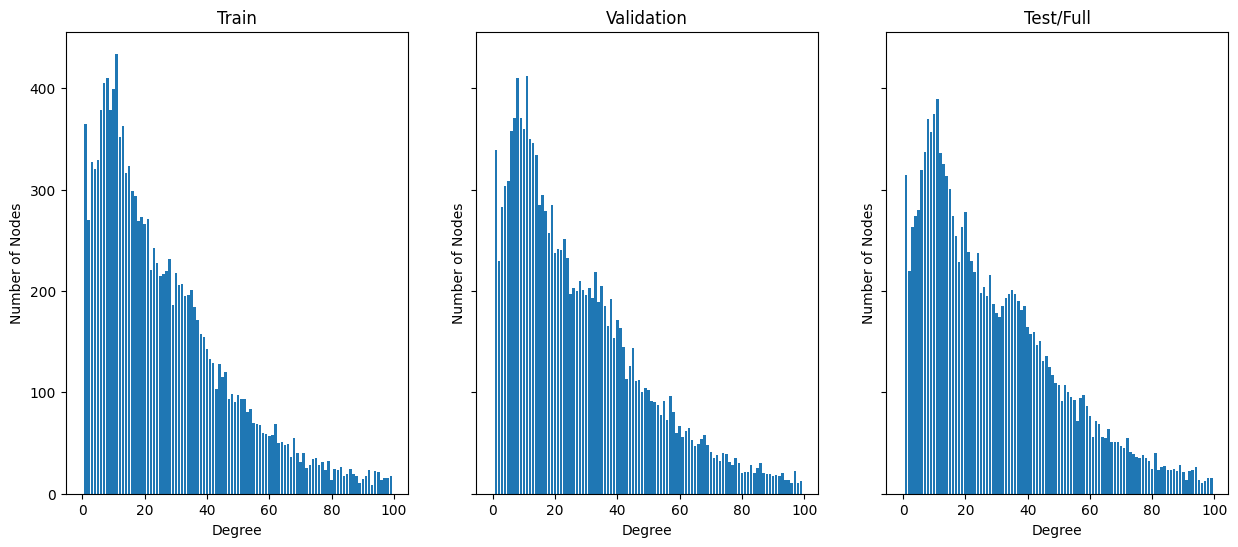

In [103]:
def plot_degrees(G_train, G_train_val, G_full, up_to=25):
    fig, axs = plt.subplots(ncols=3, figsize=(15,6), sharey=True)
    title = ["Train", "Validation", "Test/Full"]
    for i, split in enumerate([G_train, G_train_val, G_full]):
        degrees = nx.degree_histogram(split)
        axs[i].bar(range(up_to), degrees[:up_to])
        axs[i].set_title(f"{title[i]}")
        axs[i].set_xlabel("Degree")
        axs[i].set_ylabel("Number of Nodes")
plot_degrees(G_train, G_train_val, G_full, up_to=100)

### WN18RR

In [104]:
df_train = pd.read_csv("../data/wn18rr/train.txt", sep="\t", header=None, names=["head", "relation", "tail"])
df_val = pd.read_csv("../data/wn18rr/valid.txt", sep="\t", header=None, names=["head", "relation", "tail"])
df_test = pd.read_csv("../data/wn18rr/test.txt", sep="\t", header=None, names=["head", "relation", "tail"])

In [105]:
df_train.head()

,head,relation,tail
0,260881,_hypernym,260622
1,1332730,_derivationally_related_form,3122748
2,6066555,_derivationally_related_form,645415
3,9322930,_instance_hypernym,9360122
4,7193596,_derivationally_related_form,784342


In [106]:
G_train, G_train_val, G_full = construct_graphs(df_train, df_val, df_test)

In [107]:
print_stats(G_train, G_train_val, G_full)

Train set:
 Weakly connected: False
 Number of components: 46
 Size of components: [40442, 8, 6, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 Number of nodes in graph: 40559
 Number of edges in graph: 86835

Val set:
 Weakly connected: False
 Number of components: 30
 Size of components: [40679, 8, 6, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 Number of nodes in graph: 40757
 Number of edges in graph: 89869

Test set:
 Weakly connected: False
 Number of components: 13
 Size of components: [40917, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 Number of nodes in graph: 40943
 Number of edges in graph: 93003



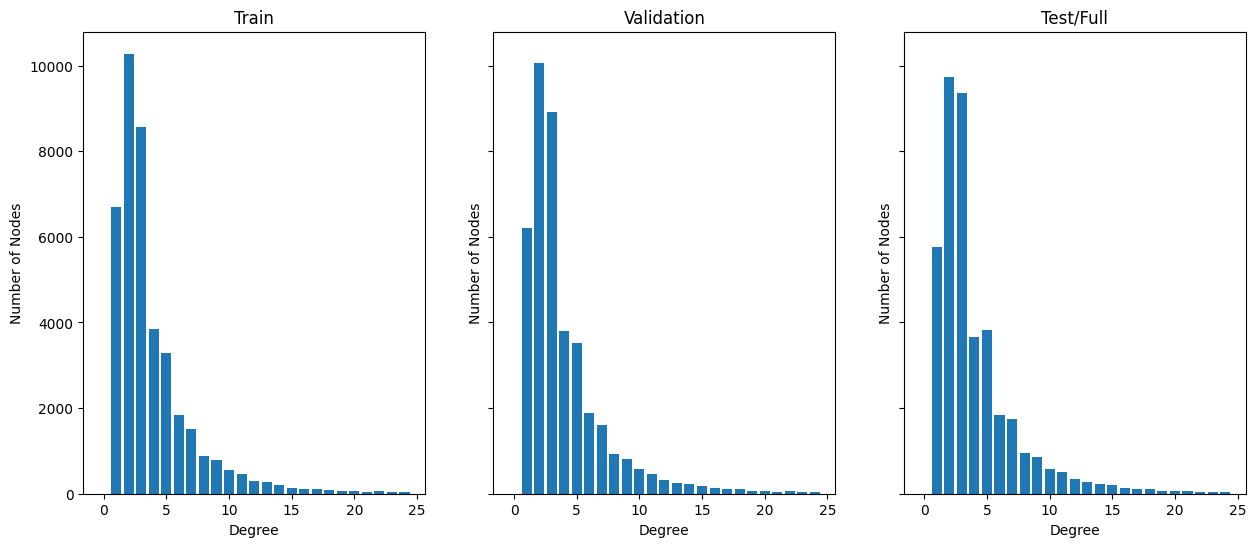

In [108]:
plot_degrees(G_train, G_train_val, G_full, up_to=25)

### LncTarD

In [109]:
df_train1 = pd.read_csv("../data/lnctard_our_split/train1.txt", sep="\t", header=None, names=["head", "relation", "tail"])
df_train2 = pd.read_csv("../data/lnctard_our_split/train2.txt", sep="\t", header=None, names=["head", "relation", "tail"])
df_val = pd.read_csv("../data/lnctard_our_split/valid.txt", sep="\t", header=None, names=["head", "relation", "tail"])
df_test = pd.read_csv("../data/lnctard_our_split/test.txt", sep="\t", header=None, names=["head", "relation", "tail"])

In [110]:
df_train = pd.concat([df_train1, df_train2])

In [111]:
df_train.head()

,head,relation,tail
0,1700020I14Rik,ceRNA or sponge,CGRP
1,17beta-E2,transcriptional regulation,LINC01541
2,7SK,interact with protein,CDC6
3,91H,epigenetic regulation,H19
4,A1BG-AS1,ceRNA or sponge,SMAD7


In [112]:
G_train, G_train_val, G_full = construct_graphs(df_train, df_val, df_test)

In [113]:
print_stats(G_train, G_train_val, G_full)

Train set:
 Weakly connected: False
 Number of components: 295
 Size of components: [3256, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 Number of nodes in graph: 

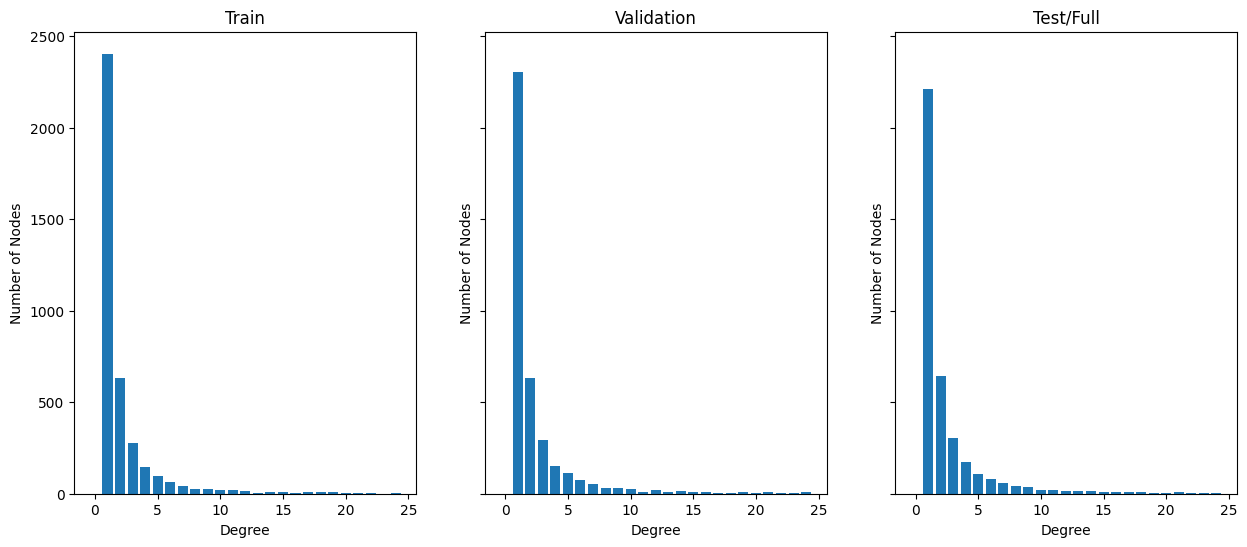

In [114]:
plot_degrees(G_train, G_train_val, G_full, up_to=25)